In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [41]:
file = pd.read_stata("data/data4diarynew_ITA.dta")

In [42]:
df = file[['userid','Extraversion','Agreeableness','Conscientiousness','Neuroticism','Openness']]
df.dropna()

,userid,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,0,68.75,87.50,93.75,50.00,87.50
1,1,100.00,100.00,31.25,75.00,75.00
2,10,62.50,81.25,62.50,37.50,87.50
3,100,18.75,87.50,81.25,6.25,50.00
4,101,50.00,68.75,62.50,18.75,56.25
...,...,...,...,...,...,...
244,95,56.25,93.75,18.75,62.50,87.50
245,96,93.75,93.75,68.75,31.25,56.25
246,97,81.25,87.50,93.75,31.25,68.75
247,98,43.75,50.00,81.25,43.75,100.00


/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/si

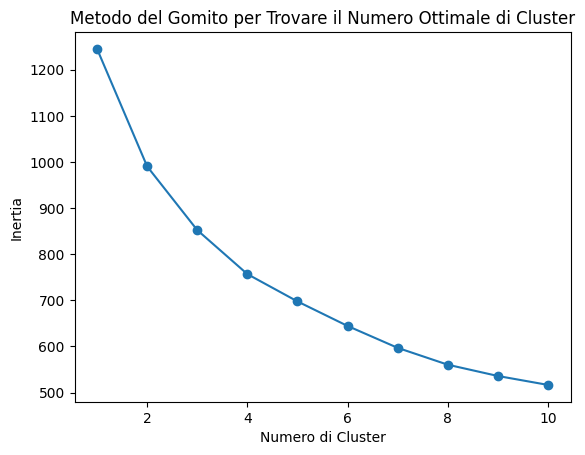

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13519/297160914.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


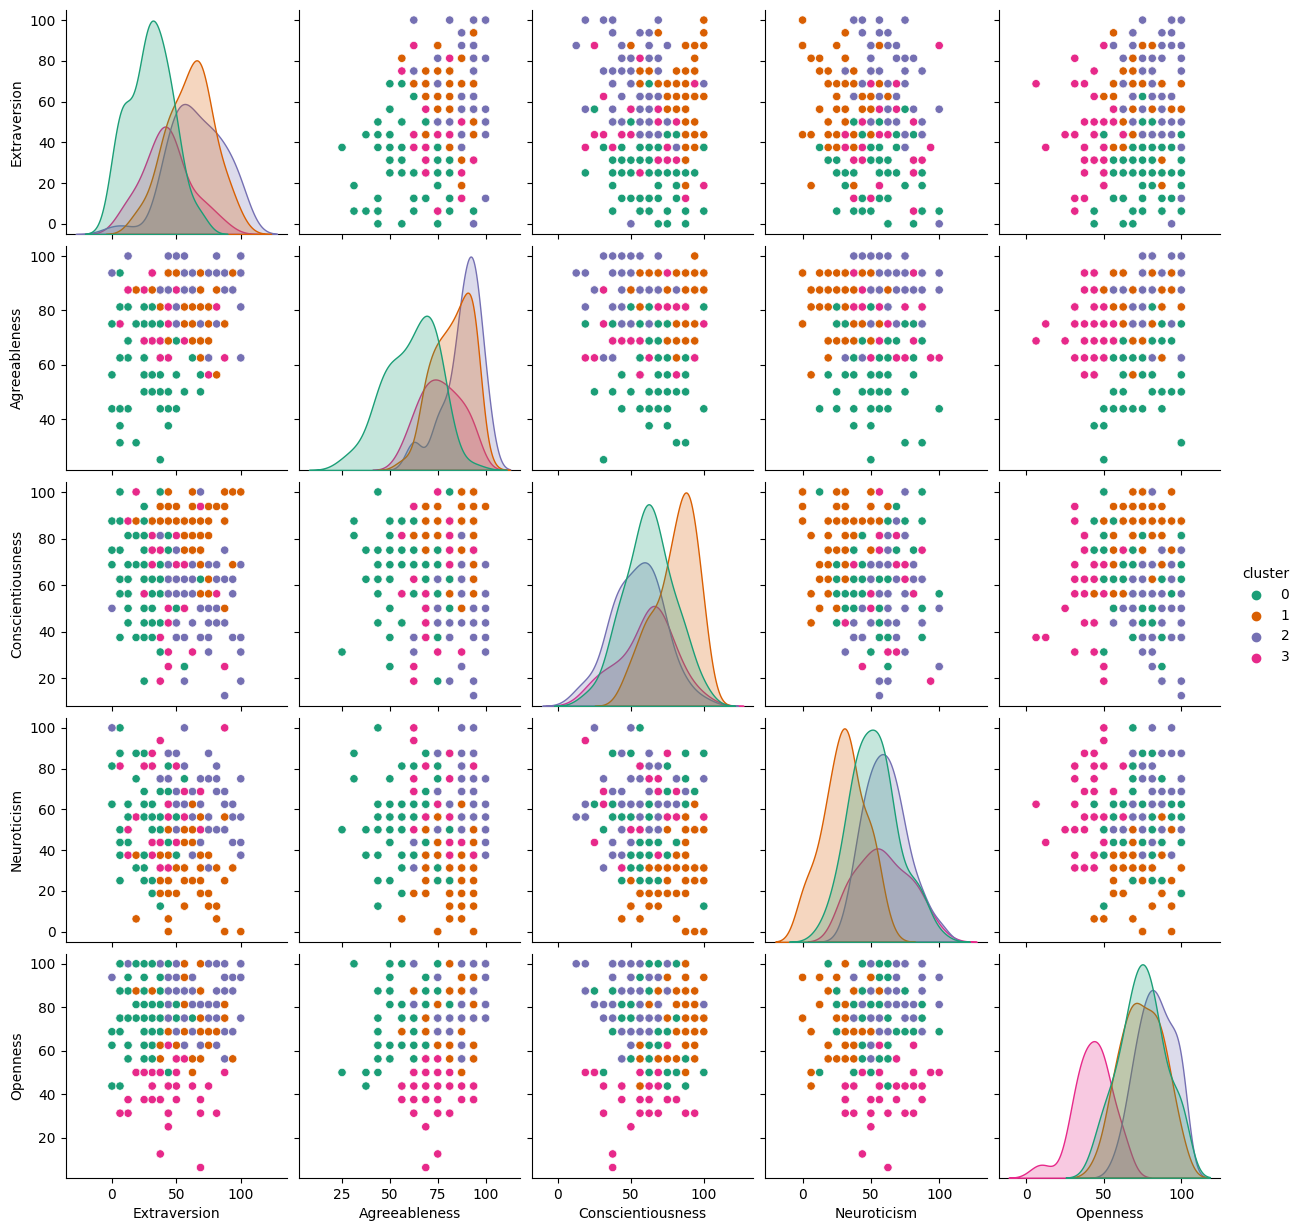

    userid  cluster
0        0        1
1        1        2
2       10        1
3      100        1
4      101        1
..     ...      ...
244     95        2
245     96        1
246     97        1
247     98        0
248     99        1

[249 rows x 2 columns]


In [43]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

df_imputed['userid'] = df['userid']

X = df_imputed.drop('userid', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metodo del Gomito per Trovare il Numero Ottimale di Cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inertia')
plt.show()


num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, hue='cluster', palette='Dark2')
plt.show()

print(df[['userid', 'cluster']])

/tmp/ipykernel_13519/246081601.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['PCA1', 'PCA2', 'PCA3']] = X_pca
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

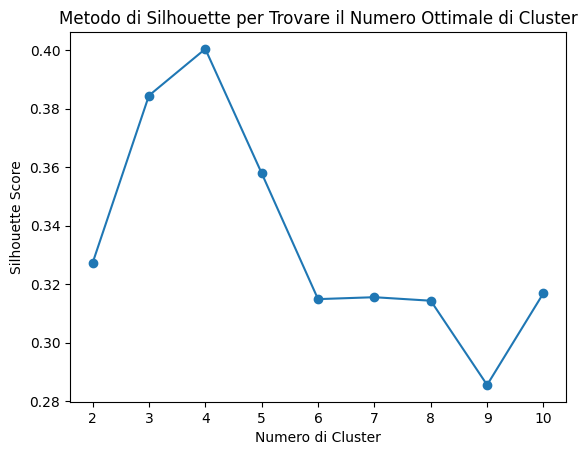

/home/chemo/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_13519/246081601.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_pca)


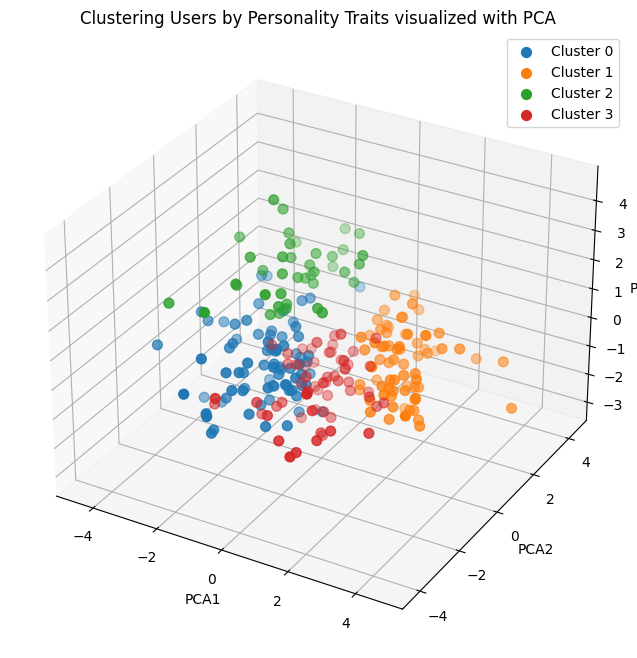

    userid  cluster
0        0        1
1        1        3
2       10        1
3      100        1
4      101        1
..     ...      ...
244     95        3
245     96        1
246     97        1
247     98        0
248     99        1

[249 rows x 2 columns]


In [52]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

df_imputed['userid'] = df['userid']
X = df_imputed.drop('userid', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df[['PCA1', 'PCA2', 'PCA3']] = X_pca

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Visualizzare il grafico del coefficiente di Silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Metodo di Silhouette per Trovare il Numero Ottimale di Cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Silhouette Score')
plt.show()

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_num}', marker='o', s=50)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Clustering Users by Personality Traits visualized with PCA')

plt.legend()
plt.show()

# Visualizzare i risultati
print(df[['userid', 'cluster']])



In [45]:
file_da_salvare = df[['userid', 'cluster']]

In [46]:
file_da_salvare.to_csv("clusters.csv")

In [47]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Inertia: 357.05580351792895


In [48]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, df['cluster'])
print(f'Calinski-Harabasz Index: {ch_score}')


Calinski-Harabasz Index: 79.54081673620097


In [49]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.2572405039362365


In [50]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, df['cluster'])
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 1.3471791417863483


In [51]:
df[['userid', 'cluster']]

user_counts = df['cluster'].value_counts().reset_index()

user_counts.columns = ['cluster', 'user_count']

user_counts

,cluster,user_count
0,3,78
1,0,67
2,1,63
3,2,41
